In [607]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import scipy as sp

In [957]:
stats_def = pd.read_csv("csv_files/tot_1516_def.csv")
stats_fw = pd.read_csv("csv_files/tot_1516_fw.csv")
stats_kp = pd.read_csv("csv_files/tot_1516_keeper.csv")
stats_mid = pd.read_csv("csv_files/tot_1516_mid.csv")

In [958]:
member_df_1516 = pd.read_csv("C:\\PythonProj\\csv_files\\players_with_son_1516.csv", header=None).loc[1:, 1:11]
member_df_1617 = pd.read_csv("C:\\PythonProj\\csv_files\\players_with_son_1617.csv", header=None).loc[1:, 1:11]
member_df_1718 = pd.read_csv("C:\\PythonProj\\csv_files\\players_with_son_1718.csv", header=None).loc[1:, 1:11]
member_df_1819 = pd.read_csv("C:\\PythonProj\\csv_files\\players_with_son_1819.csv", header=None).loc[1:, 1:11]

# Comp-DataFrame

In [959]:
# Empty Dataframe for saving values of Seasons

# df_corr = pd.DataFrame(columns=['15/16', '16/17', '17/18', '18/19'], index=['def', 'fw', 'kp', 'mid', 'Mr.Son'])
# df_stats = pd.DataFrame(columns=['15/16', '16/17', '17/18', '18/19'], index=['def', 'fw', 'kp', 'mid', 'Mr.Son'])

# EPL 15/16 Season

## Member-Stat Dictionary 만들기

- for key, value in ages.items():
    print('{}의 나이는 {} 입니다'.format(key, value))

In [1012]:
import ast
season = ['15/16', '16/17', '17/18', '18/19']
position = ['def', 'fw', 'kp', 'mid', 'Mr.Son']

data_1516 = pd.read_csv("C:\\PythonProj\\csv_files\\df_stats.csv", delimiter=',', sep=',', index_col=0)[season[0]].to_frame()

# data 내부 list 파싱
for j in position:
    data_1516.loc[j][season[0]] = ast.literal_eval(data_1516.loc[j][season[0]])

In [1024]:
member_df_1516.head()
data_1516['15/16']['def']

[2.2094,
 2.2337,
 2.1666,
 2.3014,
 2.2013,
 0.0,
 2.0881,
 2.3469,
 0.0,
 0.0,
 2.3017,
 0.0]

In [1027]:
# parsing and extracting stats lists
stats_def = data_1516.loc['def']['15/16']
stats_fw = data_1516.loc['fw']['15/16']
stats_kp = data_1516.loc['kp']['15/16']
stats_mid = data_1516.loc['mid']['15/16'] 

# stats_1516 = stats_1516[~np.isnan(stats_1516)] # null값 제거하기 # 제거전 len:40

stats_ovrl = np.hstack([stats_def, stats_fw, stats_kp, stats_mid])
len(stats_ovrl) # 35
stats_ovrl

array([2.2094, 2.2337, 2.1666, 2.3014, 2.2013, 0.    , 2.0881, 2.3469,
       0.    , 0.    , 2.3017, 0.    , 1.6804, 1.2925, 1.3555, 0.    ,
       1.6804, 2.5205, 1.2305, 0.    , 0.    , 0.9695, 1.0169, 1.1315,
       1.0616, 0.9695, 1.1021, 1.1111, 1.0869, 0.9695, 0.9695, 0.    ,
       0.9695, 1.1208, 1.022 ])

In [1021]:
# names_1516과 member_df_1516의 'Name' 행 포맷 맞추기

stats_def['Name'] = stats_def['Name'].replace("-", " ")
stats_fw['Name'] = stats_fw['Name'].replace("-", " ")
stats_kp['Name'] = stats_kp['Name'].replace("-", " ")
stats_mid['Name'] = stats_mid['Name'].replace("-", " ")

TypeError: list indices must be integers or slices, not str

In [1008]:
names_1516 = np.hstack([stats_def['Name'], stats_fw['Name'], stats_kp['Name'], stats_mid['Name']])
names_1516

array(['Kyle-Walker', 'Danny-Rose', 'Toby-Alderweireld', 'Jan-Vertonghen',
       'Kieran-Trippier', 'Federico-Fazio', 'Kevin-Wimmer', 'Ben-Davies',
       'Cameron-Carter-Vickers', 'Kyle-Walker-Peters', 'DeAndre-Yedlin',
       'Dominic-Ball', 'Son-Heung-Min', 'Harry-Kane', "Clinton-N'Jie",
       'Emmanuel-Adebayor', 'Roberto-Soldado', 'Hugo-Lloris',
       'Michel-Vorm', 'Luke-McGee', 'Tom-Glover', 'Nabil-Bentaleb',
       'Ryan-Mason', 'Erik-Lamela', 'Eric-Dier', 'Mousa-Dembele',
       'Dele-Alli', 'Nacer-Chadli', 'Christian-Eriksen', 'Josh-Onomah',
       'Tom-Carroll', 'Harry-Winks', 'Alex-Pritchard', 'Andros-Townsend',
       'Aaron-Lennon'], dtype=object)

In [1020]:
len(names_1516) # 35
len(stats_ovrl) # 35

35

In [997]:
name_stats_dict = {}
name_stats_dict = dict(zip(names_1516, stats_ovrl))
name_stats_dict_keys = list(name_stats_dict.keys())
name_stats_dict_values = list(name_stats_dict.values())

In [1002]:
# name_stats_dict -> member_df_1516
# member_df_1516[열][행]

for i in range(1, 11+1): # 열 수
    for j in range(1, len(member_df_1516[i])+1): # 행 수
        
        if member_df_1516[i][j] in name_stats_dict_keys:
            n = member_df_1516[i][j]
            print(n)
            member_df_1516[i][j] = int(name_stats_dict[n])
    
member_df_1516 # (13, 11)
name_stats_dict_keys
# member_df_1516.map(name_stats_dict.keys(): name_stats_dict.values())

['Kyle-Walker',
 'Danny-Rose',
 'Toby-Alderweireld',
 'Jan-Vertonghen',
 'Kieran-Trippier',
 'Federico-Fazio',
 'Kevin-Wimmer',
 'Ben-Davies',
 'Cameron-Carter-Vickers',
 'Kyle-Walker-Peters',
 'DeAndre-Yedlin',
 'Dominic-Ball',
 'Son-Heung-Min',
 'Harry-Kane',
 "Clinton-N'Jie",
 'Emmanuel-Adebayor',
 'Roberto-Soldado',
 'Hugo-Lloris',
 'Michel-Vorm',
 'Luke-McGee',
 'Tom-Glover',
 'Nabil-Bentaleb',
 'Ryan-Mason',
 'Erik-Lamela',
 'Eric-Dier',
 'Mousa-Dembele',
 'Dele-Alli',
 'Nacer-Chadli',
 'Christian-Eriksen',
 'Josh-Onomah',
 'Tom-Carroll',
 'Harry-Winks',
 'Alex-Pritchard',
 'Andros-Townsend',
 'Aaron-Lennon']

In [971]:
member_df_1516[1][2]

'Hugo Lloris'

In [903]:
for key, value in name_stats_dict.items():
    print('{}의 평점은 {} 입니다'.format(key, value))

Kyle-Walker의 평점은 2.2094 입니다
Danny-Rose의 평점은 2.2337 입니다
Toby-Alderweireld의 평점은 2.1666 입니다
Jan-Vertonghen의 평점은 2.3014 입니다
Kieran-Trippier의 평점은 2.2013 입니다
Federico-Fazio의 평점은 0.0 입니다
Kevin-Wimmer의 평점은 2.0881 입니다
Ben-Davies의 평점은 2.3469 입니다
Cameron-Carter-Vickers의 평점은 0.0 입니다
Kyle-Walker-Peters의 평점은 0.0 입니다
DeAndre-Yedlin의 평점은 2.3017 입니다
Dominic-Ball의 평점은 0.0 입니다
Son-Heung-Min의 평점은 1.6804 입니다
Harry-Kane의 평점은 1.2925 입니다
Clinton-N'Jie의 평점은 1.3555 입니다
Emmanuel-Adebayor의 평점은 0.0 입니다
Roberto-Soldado의 평점은 1.6804 입니다
Hugo-Lloris의 평점은 2.5205 입니다
Michel-Vorm의 평점은 1.2305 입니다
Luke-McGee의 평점은 0.0 입니다
Tom-Glover의 평점은 0.0 입니다
Nabil-Bentaleb의 평점은 0.9695 입니다
Ryan-Mason의 평점은 1.0169 입니다
Erik-Lamela의 평점은 1.1315 입니다
Eric-Dier의 평점은 1.0616 입니다
Mousa-Dembele의 평점은 0.9695 입니다
Dele-Alli의 평점은 1.1021 입니다
Nacer-Chadli의 평점은 1.1111 입니다
Christian-Eriksen의 평점은 1.0869 입니다
Josh-Onomah의 평점은 0.9695 입니다
Tom-Carroll의 평점은 0.9695 입니다
Harry-Winks의 평점은 0.0 입니다
Alex-Pritchard의 평점은 0.9695 입니다
Andros-Townsend의 평점은 1.1208 입니다
Aaron-Lenn

# EPL 15/16 Season

In [851]:
member_df_1516 = pd.read_csv("C:\\PythonProj\\csv_files\\players_with_son_1516.csv", header=None).loc[1:, 1:11]
member_df_1516
# member table을 stat으로 변경하기

# member 이름만 뽑아내기
# member 이름을 number label로 바꾸기
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

member_names = member_df_1516.values
member_names_transformed_1516 = []
for i in member_names:
    encoder.fit(i)
    member_names_transformed_1516.append(list(encoder.transform(i)))
    
member_names_transformed_1516 # len: 13
len(member_names_transformed_1516)

13

In [852]:
# 15/16 시즌 손흥민 경기별 평점 
rat_1516 = pd.read_csv("C:\\PythonProj\\csv_files\\players_with_son_1516.csv")['Rating'].values
len(rat_1516)
rat_1516

array([4, 6, 7, 5, 7, 7, 6, 6, 6, 7, 6, 8, 6], dtype=int64)

In [893]:
# 학습시키기
from sklearn.linear_model import LogisticRegression

X = member_names_transformed_1516
y = rat_1516
# X[:2]
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X[:10], y[:10])
clf.predict(X[10:])
clf.predict_proba(X[10:]) 
clf.score(X, y) # 0.6153846153846154
# score : Returns the mean accuracy on the given test data and labels.

0.6153846153846154

# EPL 16/17 Season

In [857]:
member_df_1617 = pd.read_csv("C:\\PythonProj\\csv_files\\players_with_son_1617.csv", header=None).loc[1:, 1:11]

# member table을 stat으로 변경하기

# member 이름만 뽑아내기
# member 이름을 number label로 바꾸기
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

member_names = member_df_1617.values
member_names_transformed_1617 = []
for i in member_names:
    encoder.fit(i)
    member_names_transformed_1617.append(list(encoder.transform(i)))
    
member_names_transformed_1617 # len: 22
len(member_names_transformed_1617)

22

In [861]:
# 16/17 시즌 손흥민 경기별 평점 
rat_1617 = pd.read_csv("C:\\PythonProj\\csv_files\\players_with_son_1617.csv")['Rating'].values
rat_1617 # len 22
# len(rat_1617)

array([7, 9, 7, 5, 8, 8, 8, 8, 7, 6, 7, 7, 8, 6, 7, 6, 6, 5, 5, 7, 8, 9],
      dtype=int64)

In [895]:
# 학습시키기
from sklearn.linear_model import LogisticRegression
from patsy import dmatrices

# X = dmatrices('member_names_transformed')
# X, y = load_iris(return_X_y=True)
X = member_names_transformed_1617
y = rat_1617
# X[:2]
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X[:18], y[:18])
clf.predict(X[18:])
clf.predict_proba(X[18:]) 
clf.score(X, y) # 0.9090909090909091

0.9090909090909091

# EPL 17/18 Season

In [867]:
member_df_1718 = pd.read_csv("C:\\PythonProj\\csv_files\\players_with_son_1718.csv", header=None).loc[1:, 1:11]
member_df_1718
# member table을 stat으로 변경하기

# member 이름만 뽑아내기
# member 이름을 number label로 바꾸기
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

member_names = member_df_1718.values
member_names_transformed_1718 = []
for i in member_names:
    encoder.fit(i)
    member_names_transformed_1718.append(list(encoder.transform(i)))
    
member_names_transformed_1718 # len: 27
# len(member_names_transformed)

[[5, 2, 7, 6, 0, 1, 3, 10, 8, 9, 4],
 [6, 2, 7, 8, 0, 4, 1, 10, 3, 9, 5],
 [3, 7, 0, 9, 4, 8, 5, 10, 6, 1, 2],
 [5, 1, 6, 2, 8, 7, 0, 9, 10, 3, 4],
 [6, 8, 0, 7, 2, 1, 9, 4, 5, 3, 10],
 [5, 1, 6, 8, 2, 3, 10, 9, 7, 0, 4],
 [6, 9, 0, 2, 7, 3, 8, 4, 1, 10, 5],
 [6, 2, 7, 8, 0, 10, 3, 1, 9, 4, 5],
 [6, 7, 8, 0, 2, 4, 3, 1, 9, 10, 5],
 [6, 7, 0, 2, 8, 3, 1, 9, 10, 4, 5],
 [6, 1, 9, 0, 5, 8, 2, 3, 10, 7, 4],
 [6, 9, 0, 7, 2, 10, 8, 1, 3, 4, 5],
 [6, 9, 0, 2, 7, 3, 8, 10, 1, 4, 5],
 [7, 2, 0, 9, 8, 5, 3, 1, 4, 10, 6],
 [6, 9, 2, 7, 1, 3, 4, 0, 10, 8, 5],
 [6, 0, 9, 2, 7, 1, 4, 10, 3, 8, 5],
 [6, 3, 8, 1, 7, 0, 9, 2, 5, 4, 10],
 [6, 7, 2, 9, 1, 0, 10, 3, 8, 5, 4],
 [6, 3, 7, 8, 0, 5, 10, 1, 9, 2, 4],
 [6, 7, 8, 0, 2, 1, 9, 10, 4, 3, 5],
 [7, 8, 2, 4, 9, 0, 3, 6, 1, 5, 10],
 [8, 2, 3, 6, 9, 1, 5, 0, 7, 10, 4],
 [5, 10, 3, 6, 4, 0, 8, 1, 7, 2, 9],
 [5, 1, 10, 6, 8, 7, 2, 0, 4, 3, 9],
 [6, 10, 1, 7, 8, 9, 3, 2, 5, 0, 4],
 [5, 1, 6, 10, 7, 3, 9, 0, 8, 4, 2],
 [5, 0, 6, 7, 10, 2, 1, 9, 8, 3, 4]]

In [870]:
# 17/18 시즌 손흥민 경기별 평점 
rat_1718 = pd.read_csv("C:\\PythonProj\\csv_files\\players_with_son_1718.csv", header=0)['Rating'].values
rat_1718

rat_1718 # len 27
# len(rat_1718)

array([6., 6., 7., 6., 7., 9., 9., 7., 6., 8., 5., 9., 7., 8., 7., 6., 7.,
       9., 7., 6., 7., 5., 8., 5., 6., 5., 7.])

In [899]:
# 학습시키기
from sklearn.linear_model import LogisticRegression

X = member_names_transformed_1718
y = rat_1718
# X[:2]
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X[:20], y[:20])
clf.predict(X[20:])
clf.predict_proba(X[20:]) 
clf.score(X, y) # 0.7777777777777778

0.7777777777777778

# Predict EPL 18/19 Season ~ 손흥민 평점

In [873]:
member_df_1819 = pd.read_csv("C:\\PythonProj\\csv_files\\players_with_son_1819.csv", header=None).loc[1:, 1:11]
member_df_1819
# member table을 stat으로 변경하기

# member 이름만 뽑아내기
# member 이름을 number label로 바꾸기
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

member_names = member_df_1819.values
member_names_transformed_1819 = []
for i in member_names:
    encoder.fit(i)
    member_names_transformed_1819.append(list(encoder.transform(i)))
    
member_names_transformed_1819 # len: 22
# len(member_names_transformed)

[[6, 7, 3, 0, 10, 5, 4, 1, 2, 8, 9],
 [4, 5, 9, 6, 1, 0, 2, 10, 7, 8, 3],
 [8, 2, 10, 5, 6, 0, 4, 1, 3, 7, 9],
 [5, 10, 6, 0, 7, 8, 1, 9, 3, 2, 4],
 [4, 9, 2, 5, 7, 1, 10, 6, 3, 0, 8],
 [6, 10, 7, 0, 2, 9, 1, 3, 5, 8, 4],
 [4, 6, 10, 5, 0, 1, 3, 7, 8, 9, 2],
 [5, 6, 2, 7, 1, 8, 0, 4, 9, 3, 10],
 [4, 5, 10, 1, 6, 8, 2, 9, 0, 3, 7],
 [5, 2, 10, 6, 8, 0, 7, 4, 1, 9, 3],
 [5, 7, 0, 10, 6, 2, 1, 4, 8, 9, 3],
 [6, 7, 1, 10, 2, 3, 8, 5, 0, 4, 9],
 [6, 2, 0, 7, 10, 1, 5, 3, 8, 9, 4],
 [4, 5, 1, 10, 6, 7, 8, 0, 9, 3, 2],
 [6, 7, 10, 2, 0, 3, 8, 1, 5, 9, 4],
 [4, 0, 10, 8, 5, 7, 9, 1, 2, 3, 6],
 [5, 10, 7, 1, 6, 2, 0, 9, 4, 8, 3],
 [5, 6, 0, 9, 7, 1, 8, 2, 3, 4, 10],
 [5, 8, 0, 10, 6, 7, 1, 2, 3, 4, 9],
 [5, 0, 6, 10, 1, 4, 2, 9, 8, 3, 7],
 [8, 1, 10, 4, 0, 5, 2, 7, 9, 6, 3],
 [8, 5, 1, 10, 4, 0, 9, 6, 7, 2, 3]]

In [874]:
# 18/19 시즌 손흥민 경기별 평점 
rat_1819 = pd.read_csv("C:\\PythonProj\\csv_files\\players_with_son_1819.csv", header=0)['Rating'].values

rat_1819 # len 22
# len(rat_1819)

array([3, 6, 6, 7, 8, 5, 5, 5, 7, 8, 8, 6, 8, 5, 8, 9, 8, 7, 7, 8, 6, 6],
      dtype=int64)

In [900]:
# 학습시키기
from sklearn.linear_model import LogisticRegression

X = member_names_transformed_1819
y = rat_1819
# X[:2]
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X[:19], y[:19])
clf.predict(X[19:])
clf.predict_proba(X[19:]) 
clf.score(X, y) # 0.8636363636363636

0.8636363636363636

### merge

In [876]:
member_names_transformed_ovrl = np.vstack([[member_names_transformed_1516,member_names_transformed_1617,member_names_transformed_1718,member_names_transformed_1819]])
# len(member_names_transformed_ovrl.sum()) # len: 85
member_names_transformed_ovrl = member_names_transformed_ovrl.sum()
member_names_transformed_ovrl

[[5, 0, 6, 10, 7, 9, 3, 1, 8, 2, 4],
 [5, 7, 6, 10, 1, 9, 3, 0, 8, 2, 4],
 [5, 7, 10, 1, 6, 9, 8, 3, 0, 2, 4],
 [5, 7, 6, 10, 1, 2, 9, 8, 0, 3, 4],
 [6, 8, 7, 10, 1, 9, 0, 4, 3, 2, 5],
 [5, 7, 6, 10, 1, 2, 9, 8, 0, 3, 4],
 [5, 7, 6, 10, 1, 2, 9, 8, 0, 3, 4],
 [5, 7, 10, 6, 1, 8, 3, 9, 0, 2, 4],
 [4, 6, 5, 10, 1, 9, 7, 0, 8, 2, 3],
 [5, 7, 6, 10, 1, 2, 9, 8, 0, 3, 4],
 [6, 8, 0, 7, 10, 9, 1, 4, 3, 2, 5],
 [5, 7, 0, 6, 10, 9, 8, 3, 2, 1, 4],
 [4, 6, 0, 5, 10, 1, 9, 7, 8, 2, 3],
 [4, 5, 9, 2, 6, 10, 0, 7, 3, 8, 1],
 [5, 6, 0, 9, 7, 2, 8, 1, 3, 10, 4],
 [5, 9, 0, 7, 6, 1, 2, 10, 8, 3, 4],
 [5, 9, 0, 7, 6, 8, 1, 10, 3, 2, 4],
 [5, 7, 10, 6, 0, 2, 8, 1, 3, 9, 4],
 [4, 6, 5, 9, 0, 3, 2, 7, 1, 8, 10],
 [6, 10, 4, 5, 0, 3, 2, 7, 1, 8, 9],
 [4, 9, 5, 3, 0, 6, 10, 7, 2, 8, 1],
 [5, 3, 9, 6, 0, 1, 7, 8, 2, 10, 4],
 [5, 3, 0, 6, 9, 1, 8, 7, 2, 10, 4],
 [6, 5, 9, 1, 3, 10, 0, 8, 7, 2, 4],
 [5, 6, 9, 3, 7, 0, 1, 10, 2, 4, 8],
 [4, 5, 6, 1, 9, 2, 10, 8, 7, 0, 3],
 [5, 3, 1, 6, 7, 9, 10, 2, 8, 0, 4],
 

In [877]:
# ratings
rat_ovrl = np.hstack([rat_1516, rat_1617, rat_1718, rat_1819])
rat_ovrl
# len(rat_ovrl) # 85

array([4., 6., 7., 5., 7., 7., 6., 6., 6., 7., 6., 8., 6., 7., 9., 7., 5.,
       8., 8., 8., 8., 7., 6., 7., 7., 8., 6., 7., 6., 6., 5., 5., 7., 8.,
       9., 6., 6., 7., 6., 7., 9., 9., 7., 6., 8., 5., 9., 7., 8., 7., 6.,
       7., 9., 7., 6., 7., 5., 8., 5., 6., 5., 7., 3., 6., 6., 7., 8., 5.,
       5., 5., 7., 8., 8., 6., 8., 5., 8., 9., 8., 7., 7., 8., 6., 6.])

In [901]:
# 학습시키기
from sklearn.linear_model import LogisticRegression

X = member_names_transformed_ovrl
y = rat_ovrl
# X[:2]
clf = LogisticRegression(random_state=0, solver='saga', multi_class='multinomial').fit(X[:60], y[:60])
clf.predict(X[60:])
clf.predict_proba(X[60:]) 
clf.score(X, y) # lbfgs : 0.40476190476190477 # newton-cg: 0.47619047619047616 # sag : 0.47619047619047616

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.40476190476190477

## Plotting for Presentation

In [554]:
from sklearn.preprocessing import scale, minmax_scale, MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(data['15/16']['def'])
data['15/16']['def'] = scaler.transform(data['15/16']['def'])
data['15/16']['def'] 

ValueError: Expected 2D array, got 1D array instead:
array=[1.239  1.1861 1.2098 1.2403 1.1678 1.2215 1.1712 1.2252 1.1503].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [913]:
data = pd.read_csv("C:\\PythonProj\\csv_files\\df_stats.csv", delimiter=',', sep=',', encoding='utf-8', index_col=0)

position = ['def', 'fw', 'kp', 'mid', 'Mr.Son']
for j in position:
    data.loc[j]['15/16'] = ast.literal_eval(data.loc[j]['15/16'])
    
stats_1516 = np.hstack([ast.literal_eval(data.loc['def']['15/16']), ast.literal_eval(data.loc['fw']['15/16']), ast.literal_eval(data.loc['kp']['15/16']), ast.literal_eval(data.loc['Mr.Son']['15/16'])])
# len(stats_1516)
# data
stats_1516

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


array([2.2094, 2.2337, 2.1666, 2.3014, 2.2013, 0.    , 2.0881, 2.3469,
       0.    , 0.    , 2.3017, 0.    , 1.6804, 1.2925, 1.3555, 0.    ,
       1.6804, 2.5205, 1.2305, 0.    , 0.    , 1.6804])

In [665]:
col_tot = np.hstack([['15/16']*5,['16/17']*5,['17/18']*5,['18/19']*5])
col_sub = np.hstack(['def', 'fw', 'kp', 'mid', 'Mr.Son']*4)
season = ['15/16', '16/17', '17/18', '18/19']
position = ['def', 'fw', 'kp', 'mid', 'Mr.Son']

data = pd.read_csv("C:\\PythonProj\\csv_files\\df_stats.csv", delimiter=',', sep=',', encoding='utf-8', index_col=0)
data
# data 내부 list 파싱
import ast
# for i in season:
for j in position:
    data.loc[j]['15/16'] = ast.literal_eval(data.loc[j]['15/16'])


df_stats_set = pd.DataFrame(data, columns=[col_tot, col_sub])
df_stats_set
df_stats_set.columns.names = ["Season", "Position"]
for i in season:
    for j in position:
        for k in range(len(data[i][j])):
            df_stats_set.loc[k][(i, j)] = data.loc[j][i][k]

df_stats_set.replace(np.nan, " ")
# # df_stats_set.replace(" ", np.nan)
df_stats_set

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <class 'int'>

In [614]:
stats_1516

array([1.239 , 1.1861, 1.2098, 1.2403, 1.1678, 1.2215, 1.1712, 1.2252,
       1.1503, 2.3564, 1.9179, 2.3564, 1.9761, 1.9181, 1.9164, 1.2151,
       1.3429, 1.2219, 1.3489, 1.1712, 1.2119, 1.0759])

In [540]:
stats_def

,Name,Position,id,link,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,...,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Goals,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork
0,Kyle-Walker,Defender,3955,https://www.premierleague.com/players/3955/Kyl...,12,28,87,82,0,8,...,77,7,0,29,3,1,0,1,0,0
1,Danny-Rose,Defender,3507,https://www.premierleague.com/players/3507/Dan...,8,19,67,84,0,8,...,49,7,0,41,1,1,0,0,1,0
2,Toby-Alderweireld,Defender,4916,https://www.premierleague.com/players/4916/Tob...,13,35,45,71,0,8,...,238,3,0,9,1,4,3,0,1,0
3,Jan-Vertonghen,Defender,4666,https://www.premierleague.com/players/4666/Jan...,9,29,48,75,0,4,...,102,5,0,17,0,0,0,0,0,0
4,Kieran-Trippier,Defender,3905,https://www.premierleague.com/players/3905/Kie...,1,4,14,86,0,0,...,11,1,0,3,0,1,0,1,0,0
5,Federico-Fazio,Defender,7215,https://www.premierleague.com/players/7215/Fed...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Kevin-Wimmer,Defender,13813,https://www.premierleague.com/players/13813/Ke...,4,6,5,60,0,0,...,46,2,0,12,0,0,0,0,0,0
7,Ben-Davies,Defender,4408,https://www.premierleague.com/players/4408/Ben...,5,16,32,69,0,3,...,26,3,0,16,0,0,0,0,0,1
8,Cameron-Carter-Vickers,Defender,13814,https://www.premierleague.com/players/13814/Ca...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Kyle-Walker-Peters,Defender,13815,https://www.premierleague.com/players/13815/Ky...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [476]:
names_1516 # len : 35

array(['Kyle-Walker', 'Danny-Rose', 'Toby-Alderweireld', 'Jan-Vertonghen',
       'Kieran-Trippier', 'Federico-Fazio', 'Kevin-Wimmer', 'Ben-Davies',
       'Cameron-Carter-Vickers', 'Kyle-Walker-Peters', 'DeAndre-Yedlin',
       'Dominic-Ball', 'Son-Heung-Min', 'Harry-Kane', "Clinton-N'Jie",
       'Emmanuel-Adebayor', 'Roberto-Soldado', 'Hugo-Lloris',
       'Michel-Vorm', 'Luke-McGee', 'Tom-Glover', 'Nabil-Bentaleb',
       'Ryan-Mason', 'Erik-Lamela', 'Eric-Dier', 'Mousa-Dembele',
       'Dele-Alli', 'Nacer-Chadli', 'Christian-Eriksen', 'Josh-Onomah',
       'Tom-Carroll', 'Harry-Winks', 'Alex-Pritchard', 'Andros-Townsend',
       'Aaron-Lennon'], dtype=object)

## Plotting for Application

In [599]:
df_stats_set.replace(" ", "")

array([1.239 , 1.1861, 1.2098, 1.2403, 1.1678, 1.2215, 1.1712, 1.2252,
       1.1503,    nan, 2.3564, 1.9179, 2.3564,    nan,    nan,    nan,
          nan,    nan,    nan,    nan, 1.9761, 1.9181, 1.9164,    nan,
          nan,    nan,    nan,    nan,    nan,    nan, 1.2151, 1.3429,
       1.2219, 1.3489, 1.1712, 1.2119, 1.0759,    nan,    nan,    nan])

In [601]:
df_stats_stacked = pd.DataFrame(columns=position)

for j in position:
    df_stats_stacked[j] = 0
    for i in season:
#         for k in range(len(df_stats_set[(i, j)])):
        a = pd.Series(df_stats_set[(i, j)]
        df_stats_stacked[j].append(a).reset_index(drop=True)

# np.vstack[df_stats_set['15/16'], df_stats_set['16/17'], df_stats_set['17/18'], df_stats_set['18/19']]
df_stats_stacked

SyntaxError: invalid syntax (<ipython-input-601-cabf14c619e2>, line 8)

In [568]:
# # 혹시 stat없는사람 있는지 조회하기
# # for k in member_df_1516:
# for i in (member_df_1516.loc[1])[1:]:
#     i = i.replace(" ", "-")
# #     for j in range(1, len(i)):
#     if i not in names_1516:
#         print(i)
        
        
# for i in names_1516:
     
#     for j in (member_df_1516.loc[1])[1:]:
#         j = j.replace(" ", "-")
#         if i not in member_df_1516:
#             print(j)

In [569]:
names_map = list(range(1, 36))
len(stats_1516)

22

In [570]:
member_df_1516.head() # (39, 18)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,,,,,,,,,,,,,,,,,,
NaN,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1,Hugo Lloris,Ben Davies,Jan Vertonghen,Toby Alderweireld,Kyle Walker,Son Heung-Min,Erik Lamela,Christian Eriksen,Ryan Mason,Eric Dier,Harry Kane,Michel Vorm,Kevin Wimmer,Danny Rose,Josh Onomah,Nacer Chadli,Tom Carroll,Clinton N'Jie
1,Hugo Lloris,Kyle Walker,Jan Vertonghen,Toby Alderweireld,Danny Rose,Son Heung-Min,Erik Lamela,Christian Eriksen,Ryan Mason,Eric Dier,Harry Kane,Michel Vorm,Kevin Wimmer,Ben Davies,Harry Winks,Tom Carroll,Nacer Chadli,Clinton N'Jie
2,Hugo Lloris,Kyle Walker,Toby Alderweireld,Danny Rose,Jan Vertonghen,Son Heung-Min,Mousa Dembele,Erik Lamela,Christian Eriksen,Eric Dier,Harry Kane,Michel Vorm,Kevin Wimmer,Ben Davies,Ryan Mason,Tom Carroll,Nacer Chadli,Clinton N'Jie
0,Hugo Lloris,Kyle Walker,Jan Vertonghen,Toby Alderweireld,Danny Rose,Dele Alli,Mousa Dembele,Eric Dier,Christian Eriksen,Erik Lamela,Harry Kane,Michel Vorm,Ben Davies,Kieran Trippier,Son Heung-Min,Ryan Mason,Tom Carroll,Nacer Chadli


In [595]:
# member 이름을 number label로 바꾸기
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

member_names = member_df_1516.values
member_names = member_names[1:]
member_names_transformed = []
for i in member_names:
    encoder.fit(i)
    member_names_transformed.append(list(encoder.transform(i)))

# member이름을 stat으로 바꾸기

'''
['Hugo Lloris', 'Ben Davies', 'Jan Vertonghen', 'Toby Alderweireld',
'Kyle Walker', 'Son Heung-Min', 'Erik Lamela', 'Christian Eriksen',
'Ryan Mason', 'Eric Dier', 'Harry Kane', 'Michel Vorm',
'Kevin Wimmer', 'Danny Rose', 'Josh Onomah', 'Nacer Chadli',
'Tom Carroll', "Clinton N'Jie"]

[7, 0, 8, 16, 11, 15, 5, 1, 14, 4, 6, 12, 10, 3, 9, 13, 17, 2]

'''
member_names_transformed[0]

[7, 0, 8, 16, 11, 15, 5, 1, 14, 4, 6, 12, 10, 3, 9, 13, 17, 2]

In [528]:
rating_df_1516 = pd.read_csv("C:\\PythonProj\\csv_files\\Son_1516_ratings_df.csv")['Rating']
rating_df_1617 = pd.read_csv("C:\\PythonProj\\csv_files\\Son_1617_ratings_df.csv")['Rating']
rating_df_1718 = pd.read_csv("C:\\PythonProj\\csv_files\\Son_1718_ratings_df.csv")['Rating']
rating_df_1819 = pd.read_csv("C:\\PythonProj\\csv_files\\Son_1819_ratings_df.csv")['Rating']

In [532]:
rating_df_1516 # len : 13

0     4
1     6
2     7
3     5
4     7
5     7
6     6
7     6
8     6
9     7
10    6
11    8
12    6
Name: Rating, dtype: int64

**Logistic Regression Reference Pages** - *For Recommendation Engine*
- [연관규칙분석 설명](https://ratsgo.github.io/machine%20learning/2017/04/08/apriori/) </br>
- [연관규칙 코드](https://frhyme.github.io/associative_mining/)

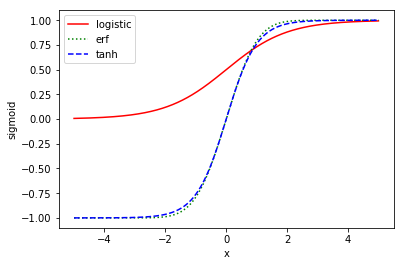

In [10]:
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="logistic")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="erf")
plt.plot(xx, np.tanh(xx), 'b--', label="tanh")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.ylabel("sigmoid")
plt.show()

In [344]:
# import statsmodels.api as sm

# data_wrole = sm.datasets.get_rdataset("womensrole", package="HSAUR")
# df_wrole = data_wrole.data
# df_wrole["ratio"] = df_wrole.agree / (df_wrole.agree + df_wrole.disagree)
# df_wrole.tail()

,education,sex,agree,disagree,ratio
37,16,Female,13,115,0.101562
38,17,Female,3,28,0.096774
39,18,Female,0,21,0.000000
40,19,Female,1,2,0.333333
41,20,Female,2,4,0.333333


In [386]:
sns.scatterplot(x="Position", y="Count", style="Season", data=df_stats_set)
plt.grid(True)
plt.show()

ValueError: Could not interpret input 'Position'

In [4]:
import pandas as pd 
import itertools 


def support(df, item_lst):
    return (df[list(item_lst)].sum(axis=1)==len(item_lst)).mean()


def make_all_set_over_support(df, support_threshold):
    items = []
    single_items = [col for col in df.columns if support(df, [col]) > support_threshold] # size 1 items
    
    size = 2
    while True:
        new_items = []
        for item_cand in itertools.combinations(single_items, size):
            #print(item_cand, (df[list(item_cand)].sum(axis=1)==size).mean())
            if support(df, list(item_cand)) > support_threshold:
                new_items.append(list(item_cand))
        if len(new_items)==0:
            break
        else:
            items+=new_items
            size+=1
    items += [ [s] for s in single_items]# 이렇게 해줘야 모든 type이 list가 됨
    return items


def make_confidence_lst(df, item_set_over_support, confidence_threshold):
    r_lst = []
    for item1 in item_set_over_support:
        for item2 in item_set_over_support:
            if len(set(item1).intersection(set(item2)))==0:
                conf = support(df, list(set(item1).union(set(item2))))/ support(df, item1)
                if conf > confidence_threshold:
                    r_lst.append((item1, item2, conf))
            else:
                continue
    return sorted(r_lst, key=lambda x: x[2], reverse=True)


def make_lift_lst(df, item_set_over_support, lift_threhsold):
    r_lst = []
    for item1 in item_set_over_support:
        for item2 in item_set_over_support:
            if len(set(item1).intersection(set(item2)))==0:
                lift = support(df, list(set(item1).union(set(item2))))
                lift /= support(df, item1)
                lift /= support(df, item2)
                if lift > lift_threhsold:
                    r_lst.append((item1, item2, lift))
            else:
                continue
    return sorted(r_lst, key=lambda x: x[2], reverse=True)


over_support_lst = make_all_set_over_support(df, 0.07)# 0.05로 하면 두 개짜리도 나옴. 로 하면 3개 짜리도 나옴
print("over support list")
print(over_support_lst)
print("-----------------")
print("over confidence list")
for a, b, conf in  make_confidence_lst(df, over_support_lst, 0.53):
    print("{} => {}: {}".format(a, b, conf))
print("-----------------")
print("over lift list")
for a, b, lift in  make_lift_lst(df, over_support_lst, 5.6):
    print("{} => {}: {}".format(a, b, lift))
print("-----------------")

In [535]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from patsy import dmatrices

y, X = dmatrices('')
# X, y = load_iris(return_X_y=True)
X = member_df_1516.loc[::3]
y = rating_df_1516
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)
clf.predict(X[:2, :])
clf.predict_proba(X[:2, :]) 
clf.score(X, y)

ValueError: could not convert string to float: 'Tom Carroll'